Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 81982480.0000 - val_loss: 46467360.0000
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 41946704.0000 - val_loss: 31198184.0000
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 35913916.0000 - val_loss: 30709744.0000
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 34381024.0000 - val_loss: 30103188.0000
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 31842720.0000 - val_loss: 29442796.0000
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31825250.0000 - val_loss: 28703632.0000
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32099988.0000 - val_loss: 27823426.0000
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32582292.0000 - val_loss: 27289454.0000
Epoch 9/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 29674304.0000 - val_loss: 25851454.0000
Epoch 10/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 28953732.0000 - val_loss: 24666062.0000
Epoch 11/2

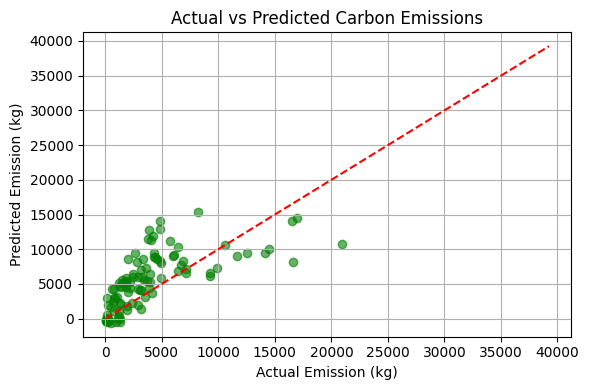


🚚 Suggested Routes (Lowest Emission First):
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


,distance_km,cargo_weight_ton,avg_speed_kmph,traffic_level,weather,vehicle_type,predicted_emission
0,120,5,60,Medium,Clear,Hybrid,-117.416069
2,130,5,65,High,Snow,Electric,266.330658
1,100,5,55,Low,Rain,Diesel,921.204712


In [2]:
# 📦 Install Required Packages (Skip if on Kaggle)
!pip install -q scikit-learn tensorflow

# 📚 Imports
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# 🧪 1. Simulate Data
np.random.seed(42)

n_samples = 5000
data = pd.DataFrame({
    'distance_km': np.random.uniform(10, 500, n_samples),
    'cargo_weight_ton': np.random.uniform(0.5, 20, n_samples),
    'avg_speed_kmph': np.random.uniform(20, 90, n_samples),
    'traffic_level': np.random.choice(['Low', 'Medium', 'High'], n_samples),
    'weather': np.random.choice(['Clear', 'Rain', 'Snow', 'Fog'], n_samples),
    'vehicle_type': np.random.choice(['Diesel', 'Electric', 'Hybrid'], n_samples)
})

# Add synthetic target (carbon emission in kg)
emission_factor = {'Diesel': 2.7, 'Electric': 0.5, 'Hybrid': 1.5}
traffic_factor = {'Low': 1.0, 'Medium': 1.2, 'High': 1.5}
weather_factor = {'Clear': 1.0, 'Rain': 1.1, 'Snow': 1.3, 'Fog': 1.2}

data['emission_kg'] = (
    data['distance_km'] * data['cargo_weight_ton'] *
    data['vehicle_type'].map(emission_factor) *
    data['traffic_level'].map(traffic_factor) *
    data['weather'].map(weather_factor)
)

# 🧹 2. Preprocessing
data_encoded = pd.get_dummies(data, columns=['traffic_level', 'weather', 'vehicle_type'])
X = data_encoded.drop('emission_kg', axis=1)
y = data_encoded['emission_kg']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📊 3. Define and Train Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32, verbose=1)

# 📈 4. Evaluate Model
y_pred = model.predict(X_test).flatten()
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"\n📊 Evaluation Metrics:")
print(f"MAE: {mae:.2f} kg")
print(f"RMSE: {rmse:.2f} kg")
print(f"MAPE: {mape:.2f}%")

# Plot actual vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_test[:100], y_pred[:100], alpha=0.6, c='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Emission (kg)")
plt.ylabel("Predicted Emission (kg)")
plt.title("Actual vs Predicted Carbon Emissions")
plt.grid(True)
plt.tight_layout()
plt.show()

# 📌 5. Sample Route Suggestion (Mock Function)
def suggest_route(options_df):
    options_df_encoded = pd.get_dummies(options_df)
    options_df_encoded = options_df_encoded.reindex(columns=X.columns, fill_value=0)
    predicted_emissions = model.predict(options_df_encoded.astype(np.float32)).flatten()
    options_df['predicted_emission'] = predicted_emissions
    return options_df.sort_values(by='predicted_emission')

# 🔍 Try Route Suggestion
sample_routes = pd.DataFrame([
    {'distance_km': 120, 'cargo_weight_ton': 5, 'avg_speed_kmph': 60, 'traffic_level': 'Medium', 'weather': 'Clear', 'vehicle_type': 'Hybrid'},
    {'distance_km': 100, 'cargo_weight_ton': 5, 'avg_speed_kmph': 55, 'traffic_level': 'Low', 'weather': 'Rain', 'vehicle_type': 'Diesel'},
    {'distance_km': 130, 'cargo_weight_ton': 5, 'avg_speed_kmph': 65, 'traffic_level': 'High', 'weather': 'Snow', 'vehicle_type': 'Electric'}
])

print("\n🚚 Suggested Routes (Lowest Emission First):")
suggested = suggest_route(sample_routes)
display(suggested)
